# EDA

## Date: Nov 7, 2023

---------------

## Introduction

In this notebook, we will explore the relationship between the borrowers financial characteristics and their loan outcome. We will look for any patterns between features, relying on visuals as an aid. This will also allow us to better understand our data and possible feature engineering steps to take when modeling.   

### Table of Contents

1. [Introduction](#Introduction)
   - [Table of Contents](#Table-of-Contents)
   - [Import Librarys](#Import-Librarys)
   - [Data Dictionary](#Data-Dictionary)
   - [Load the Data](#Load-the-Data)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
   - [Loan Status Imbalance](#Loan-Status-Imbalance)
   - [Loan Amount](#Loan-Amount)
   - [Average Loan Amount Over Time](#Average-Loan-Amount-Over-Time)
   - [Loan Amount by Verification Status](#Loan-Amount-by-Verification-Status)
   - [Debt to income vs Loan Status](#Debt-to-income-vs-Loan-Status)
   - [Number of loans and interest rate overtime](#Number-of-loans-and-interest-rate-overtime)
   - [Interest Rate vs Loan Amount](#Interest-Rate-vs-Loan-Amount)
   - [Loan Amount by Loan Status](#Loan-Amount-by-Loan-Status)
   - [Loan purpose](#Loan-purpose)
   - [Annual Income vs Loan Amount](#Annual-Income-vs-Loan-Amount)
   - [Correlation Heatmap](#Correlation-Heatmap)
   - [FICO Score vs Interest Rate](#FICO-Score-vs-Interest-Rate)
   - [Loan Status Over Time](#Loan-Status-Over-Time)
3. [Data Visualization](#Data-Visualization)
   - [TSNE](#TSNE)
   - [UMAP](#UMAP)


### Import Librarys

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import umap
import warnings

from IPython.display import display, JSON
from pathlib import Path

import importlib
import helpers
importlib.reload(helpers)
from helpers import data_dict, Model_Wrapper
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.manifold import TSNE

### Data Dictionary

In [2]:
data_dict()

LoanStatNew  \
0                                acc_now_delinq   
1                          acc_open_past_24mths   
2                                    addr_state   
3                                      all_util   
4                                    annual_inc   
5                              annual_inc_joint   
6                              application_type   
7                                   avg_cur_bal   
8                                bc_open_to_buy   
9                                       bc_util   
10                     chargeoff_within_12_mths   
11                      collection_recovery_fee   
12                   collections_12_mths_ex_med   
13                                  delinq_2yrs   
14                                  delinq_amnt   
15                                         desc   
16                                          dti   
17                                    dti_joint   
18                             earliest_cr_line   
19                                   emp_length   
20                                    emp_title   
21                              fico_range_high   
22                               fico_range_low   
23                                  funded_amnt   
24                              funded_amnt_inv   
25                                        grade   
26                               home_ownership   
27                                           id   
28                                      il_util   
29                          initial_list_status   
30                                       inq_fi   
31                                 inq_last_12m   
32                               inq_last_6mths   
33                                  installment   
34                                     int_rate   
35                                      issue_d   
36                           last_credit_pull_d   
37                         last_fico_range_high   
38                          last_fico_range_low   
39                              last_pymnt_amnt   
40                                 last_pymnt_d   
41                                    loan_amnt   
42                                  loan_status   
43                                   max_bal_bc   
44                                    member_id   
45                           mo_sin_old_il_acct   
46                         mo_sin_old_rev_tl_op   
47                        mo_sin_rcnt_rev_tl_op   
48                               mo_sin_rcnt_tl   
49                                     mort_acc   
50                       mths_since_last_delinq   
51                  mths_since_last_major_derog   
52                       mths_since_last_record   
53                           mths_since_rcnt_il   
54                         mths_since_recent_bc   
55                     mths_since_recent_bc_dlq   
56                        mths_since_recent_inq   
57               mths_since_recent_revol_delinq   
58                                 next_pymnt_d   
59                        num_accts_ever_120_pd   
60                               num_actv_bc_tl   
61                              num_actv_rev_tl   
62                                  num_bc_sats   
63                                    num_bc_tl   
64                                    num_il_tl   
65                                num_op_rev_tl   
66                                num_rev_accts   
67                          num_rev_tl_bal_gt_0   
68                                     num_sats   
69                             num_tl_120dpd_2m   
70                                 num_tl_30dpd   
71                           num_tl_90g_dpd_24m   
72                           num_tl_op_past_12m   
73                                     open_acc   
74                                  open_acc_6m   
75                                  open_il_12m   
76                                  open_il_24m   
77                                  open_act_il   
78     

### Load the Data

In [3]:
parquet_file_path = Path('../Cleaned_Data/eda_cleaned')
model_parquet_file_path = Path('../Cleaned_Data/model_cleaned')

try:
    # Read the parquet file
    loans_df = pd.read_parquet(parquet_file_path)
    model_df = pd.read_parquet(model_parquet_file_path)
    
except FileNotFoundError as e:
    print(e.args[1])
    print('Check file location')

In [4]:
loans_df.head(5)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
50867     23000.0      23000.0          23000.0    36     12.05   764.479980   
373353    35000.0      35000.0          35000.0    60     17.57   880.609985   
185185    33100.0      33100.0          33100.0    36     13.99  1131.119995   
33164      1000.0       1000.0           1000.0    36     11.22    32.849998   
368586     4400.0       4400.0           4400.0    36     12.29   146.759995   

        emp_length home_ownership  annual_inc verification_status   issue_d  \
50867          3.0           RENT     50000.0     Source Verified  Dec-2015   
373353         2.0           RENT    110000.0            Verified  Feb-2015   
185185         1.0       MORTGAGE     72000.0     Source Verified  Aug-2015   
33164         10.0           RENT     40000.0            Verified  Dec-2015   
368586         3.0           RENT     34000.0            Verified  Feb-2015   

       loan_status             purpose zip_code addr_state        dti  \
50867   Fully Paid  debt_consolidation    331xx         FL  13.900000   
373353  Fully Paid  debt_consolidation    774xx         TX  31.629999   
185185  Fully Paid  debt_consolidation    786xx         TX  12.130000   
33164   Fully Paid            vacation    330xx         FL  18.270000   
368586  Fully Paid  debt_consolidation    577xx         SD   8.860000   

        delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
50867           0.0         Dec-2005           700.0            704.0   
373353          0.0         May-1994           660.0            664.0   
185185          0.0         Dec-1994           750.0            754.0   
33164           0.0         Dec-2004           695.0            699.0   
368586          0.0         Oct-2000           690.0            694.0   

        inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
50867              1.0       8.0      0.0     9976.0   45.599998       12.0   
373353             0.0      27.0      0.0    50450.0   75.599998       38.0   
185185             2.0      10.0      0.0    16993.0   37.599998       29.0   
33164              1.0       9.0      0.0    12175.0   39.799999       13.0   
368586             0.0       6.0      0.0    10915.0   78.000000       17.0   

        last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  \
50867                  709.0                705.0                         0.0   
373353                 669.0                665.0                         0.0   
185185                 704.0                700.0                         0.0   
33164                  514.0                510.0                         0.0   
368586                 674.0                670.0                         0.0   

       application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
50867        Individual             0.0           0.0      11973.0   
373353       Individual             0.0         541.0     304808.0   
185185       Individual             0.0          89.0      33172.0   
33164        Individual             0.0           0.0      25333.0   
368586       Individual             0.0           0.0      10915.0   

        total_rev_hi_lim  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  \
50867            21900.0                   2.0       1710.0         11924.0   
373353           66700.0                   3.0      11289.0          9169.0   
185185           45200.0                   3.0       3686.0          8802.0   
33164            30600.0                   5.0       2815.0         17325.0   
368586           14000.0                   0.0       2183.0          1985.0   

          bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  \
50867   45.599998                       0.0          0.0               110.0   
373353  81.599998                       0.0          0.0               138.0   
185185  64.800003                       0.0          0.0               143.0

In [5]:
current_path = os.getcwd()
display(JSON({'Current Notebook Path': current_path}))

<IPython.core.display.JSON object>

## Exploratory Data Analysis

#### ***Loan Status Imbalance***

First explore the inbalance in the target variable

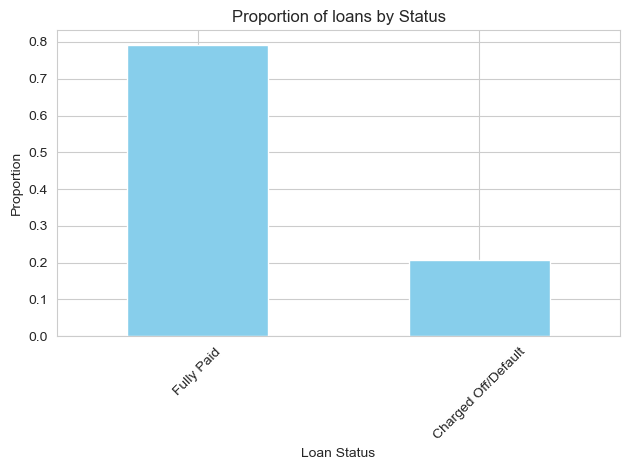

In [6]:
# Get the proportion
loan_status_counts = loans_df['loan_status'].value_counts(normalize=True)

sns.set_style("whitegrid")
loan_status_counts.plot(kind='bar', color='skyblue')
plt.title('Proportion of loans by Status')
plt.xticks(rotation=45) 
plt.xlabel('Loan Status')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

There is a large difference in proportions between the categories. This will have to be addressed when creating the models.

#### ***Loan Amount***

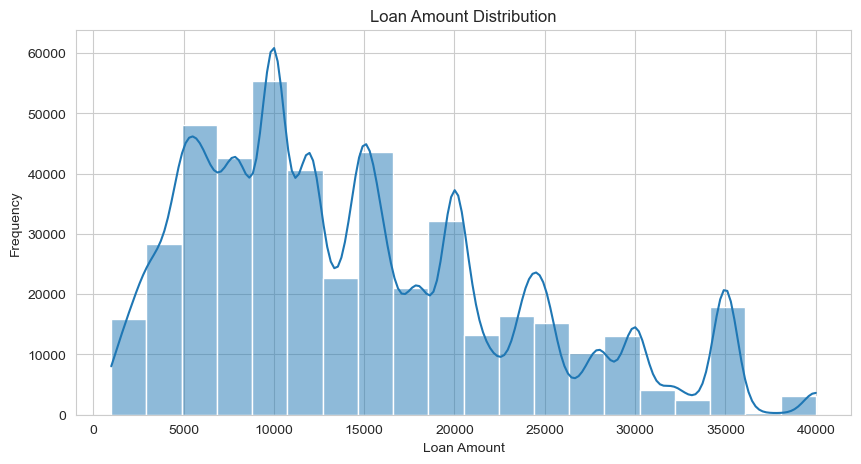

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(loans_df['loan_amnt'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Majority of loans are centered around  `$10,000`, with a right tail to `$40,000`, and a maximum of `$40,000`.
LendingClub limits their loans to `$40,000` or less. This gives us a good idea of the range for Loan Amount, as well as how much investors typically risk on a loan. 
More Information can be found here:  
https://www.lendingclub.com/help/personal-loan-faq/how-much-can-i-borrow

#### ***Average Loan Amount Over Time***

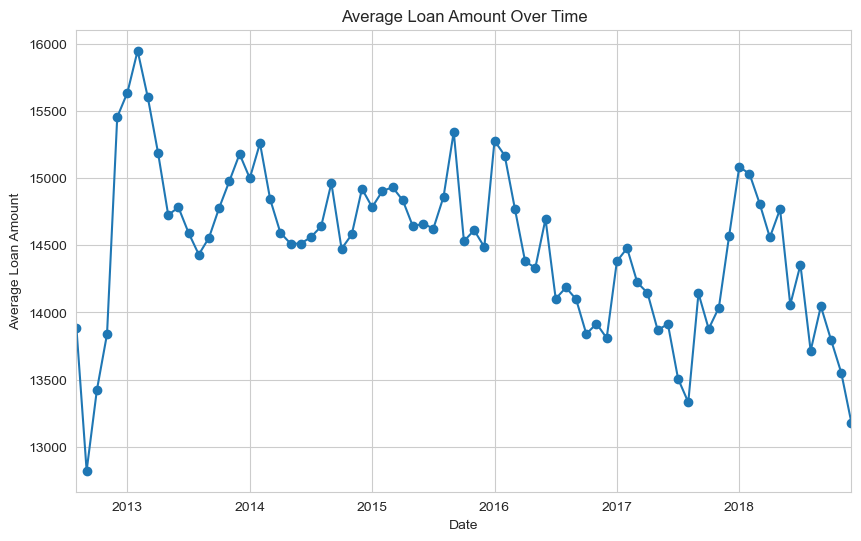

In [8]:
# Convert to datetime and reset index
loans_df['issue_d'] = pd.to_datetime(loans_df['issue_d'])
loans_df.set_index('issue_d', inplace=True)

loans_df['loan_amnt'].resample('M').mean().plot(figsize=(10,6), marker='o')
plt.title('Average Loan Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Loan Amount')
plt.show()

#### ***Loan Amount by Verification Status***

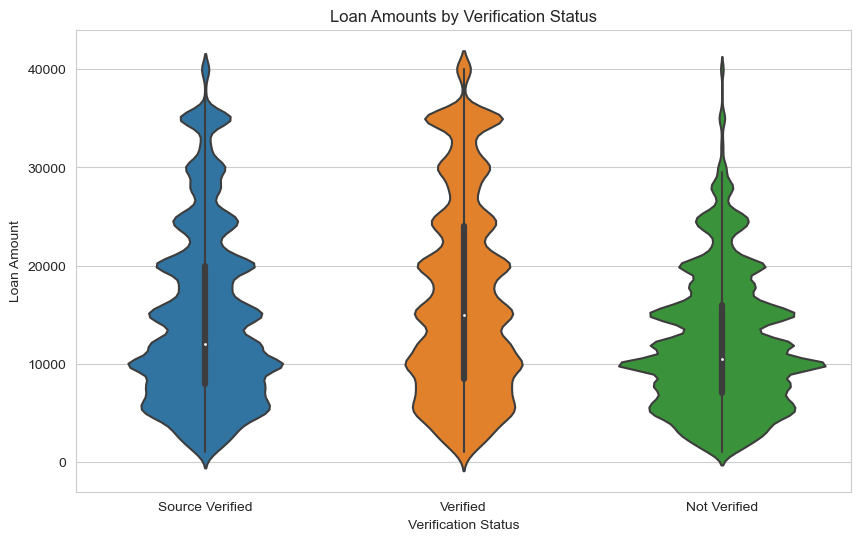

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='verification_status', y='loan_amnt', data=loans_df)
plt.title('Loan Amounts by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.show()

- Verified Income
  - Had the most uniform distribution of loans, with the highest IQR and median.
- Source verified Income
  - Higher median and IQR than non-verified loans, but a larger proportion of loans were concentrated in the lower end.
- Non verified Income
  - Lowest IQR and median. Very few loans above `$30,000`, with most loans falling under `$15,000`.

#### ***Debt to income vs Loan Status***

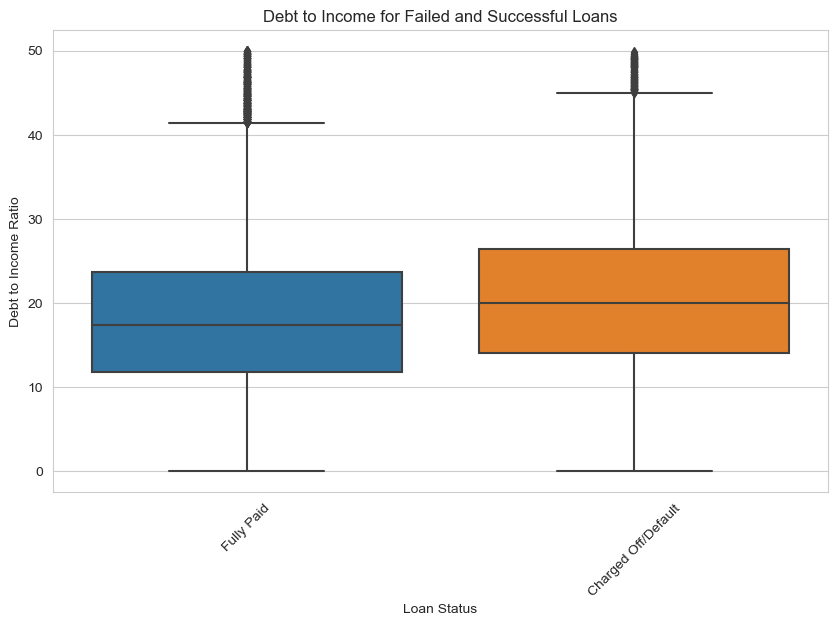

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loans_df)
plt.xticks(rotation=45)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.title('Debt to Income for Failed and Successful Loans')
plt.show()

The median DTI ratio is lower for the successful loans, with a lower IQR. Borrowers that have a lower DTI ratio are more likely to repay their loans. This could be a useful feature in classifying the target variable. 

#### ***Number of loans and interest rate overtime***

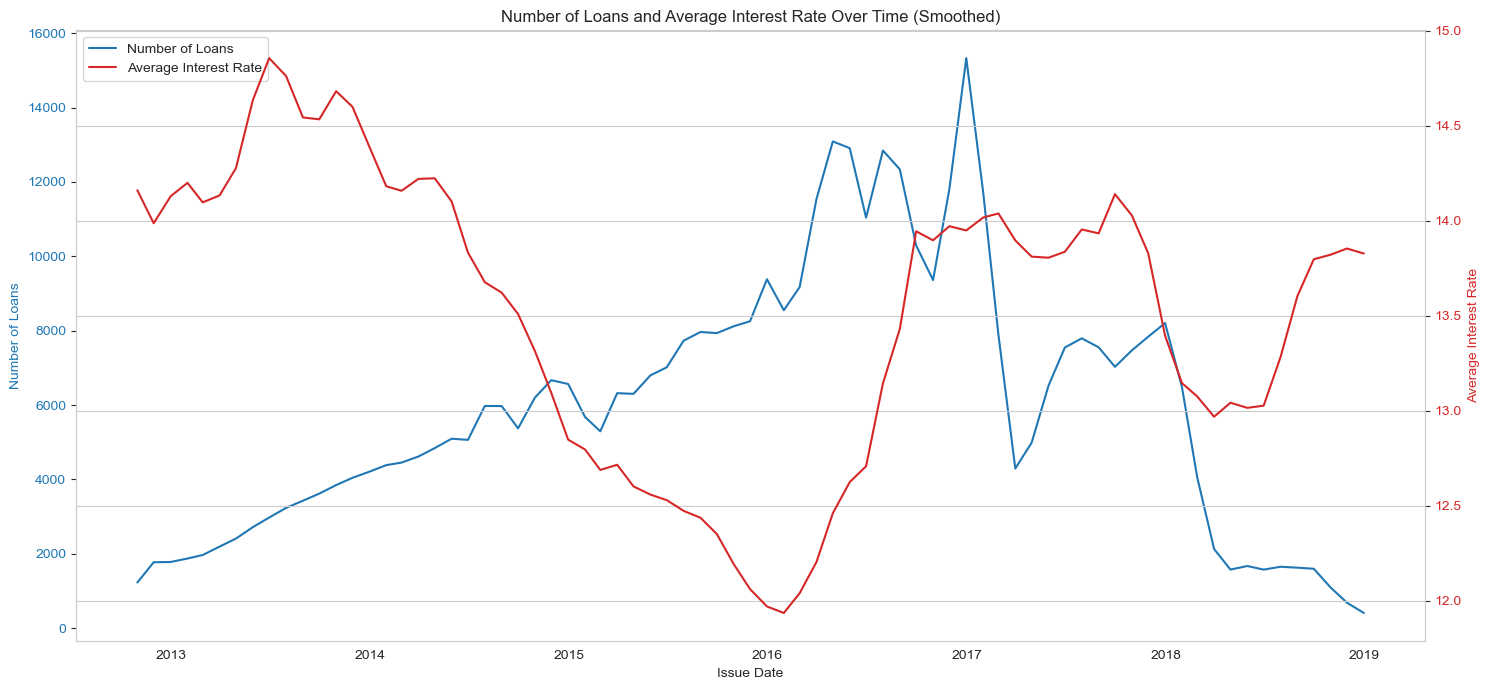

In [11]:
#Link used: https://stackoverflow.com/questions/22276066/how-to-plot-multiple-functions-on-the-same-figure

# Calculate the number of loans issued each month
loans_count = loans_df.resample('M').size()

# Calculate the average interest rate over the same period
average_interest_rate = loans_df['int_rate'].resample('M').mean()

# Smoothing the data with rolling mean
loans_count_smoothed = loans_count.rolling(window=3).mean()
average_interest_rate_smoothed = average_interest_rate.rolling(window=3).mean()

fig, ax1 = plt.subplots(figsize=(15, 7))

color_loans = 'tab:blue'
color_interest = 'tab:red'

# Plot the smoothed number of loans
ax1.set_xlabel('Issue Date')
ax1.set_ylabel('Number of Loans', color=color_loans)
ln1 = ax1.plot(loans_count_smoothed.index, loans_count_smoothed, color=color_loans, label='Number of Loans')
ax1.tick_params(axis='y', labelcolor=color_loans)
ax1.grid(False)

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot the smoothed average interest rate
ax2.set_ylabel('Average Interest Rate', color=color_interest)
ln2 = ax2.plot(average_interest_rate_smoothed.index, average_interest_rate_smoothed, color=color_interest, label='Average Interest Rate')
ax2.tick_params(axis='y', labelcolor=color_interest)

# Combined legend for both lines
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Number of Loans and Average Interest Rate Over Time (Smoothed)')
fig.tight_layout()

interest_loans_path = Path('../Screenshots/interest_loans_time_smoothed.png')
plt.savefig(interest_loans_path, dpi=600, bbox_inches='tight')

plt.show()

There appears to be a noticeable inverse correlation between the average interest rate and number of loans issued. Up until 2016, as the average interest rate falls the number of loans issued rises. However 2016 marked a turning point where the fed raised fed funds rates by 25 basis points. With a more hawkish outlook and expectations of further rate hikes, there was a significant decline in the number of loans issued in the following years. This shows that P2P loans are just as sensitive to external economic factors as other loans, and that these factors must also be considered.  

 Below are the fed fund rates over the same period of time.

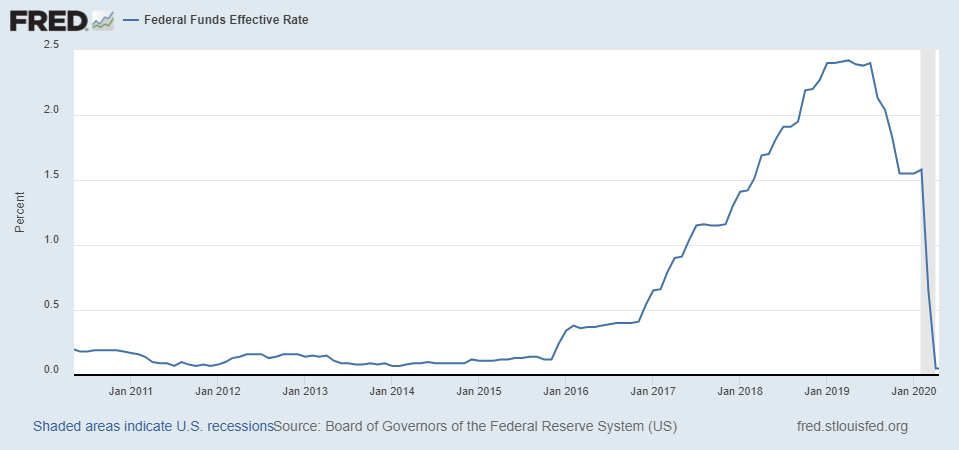

#### ***Interest Rate vs Loan Amount***

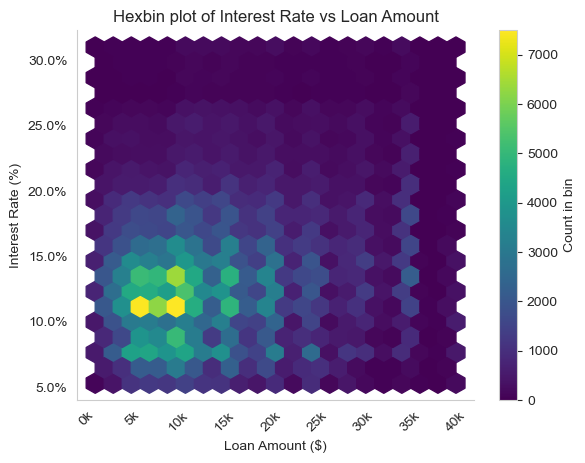

In [12]:
plt.hexbin(loans_df['funded_amnt'], loans_df['int_rate'], gridsize=20, cmap='viridis')
cb = plt.colorbar()
cb.set_label('Count in bin')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.title('Hexbin plot of Interest Rate vs Loan Amount')

x_ticks = np.arange(0, loans_df['funded_amnt'].max() + 5000, 5000)
x_labels = [f'{int(amount/1000)}k' for amount in x_ticks]

y_ticks = np.arange(5, loans_df['int_rate'].max(), 5)
y_labels = [f'{rate}%' for rate in y_ticks]

plt.xticks(x_ticks, x_labels, rotation=45)
plt.yticks(y_ticks, y_labels)

plt.grid(False)

# Hide the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

hexbin_plot = Path('../Screenshots/hexbin_plot.png')
plt.savefig(hexbin_plot, dpi=600, bbox_inches='tight')

plt.show()

The majority of loans fall between `$5,000` and `$15,000`, with an interest rate between `%10` and `%15`.

#### ***Loan Amount by Loan Status***

Median interest rate for fully paid loans:  12.119999885559082
Median interest rate for Charged Off/Default loans:  15.050000190734863


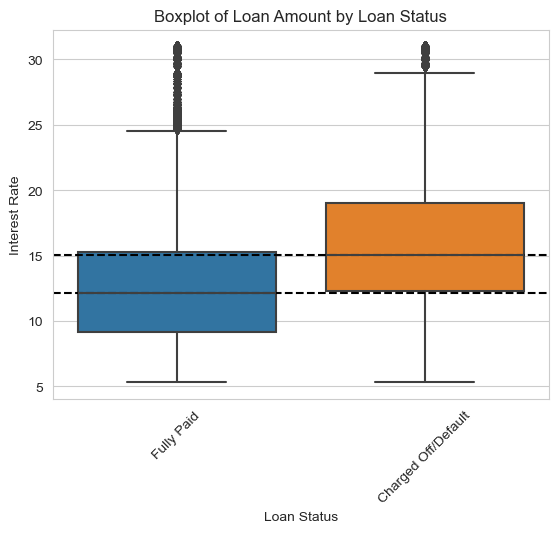

In [13]:
# Calculate medians
median_status_1 = loans_df.loc[loans_df['loan_status'] == 'Fully Paid', 'int_rate'].median()
median_status_0 = loans_df.loc[loans_df['loan_status'] == 'Charged Off/Default', 'int_rate'].median()

print('Median interest rate for fully paid loans: ', median_status_1)
print('Median interest rate for Charged Off/Default loans: ', median_status_0)

sns.boxplot(data=loans_df, x='loan_status', y='int_rate')
plt.xticks(rotation=45) 

plt.axhline(y=median_status_0, color='black', linestyle='--')
plt.axhline(y=median_status_1, color='black', linestyle='--')

plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

Charged off / defaulted loans have a higher median interest rate, a larger and higher IQR, as well as a higher maximum interest rate. 

#### ***Loan purpose***

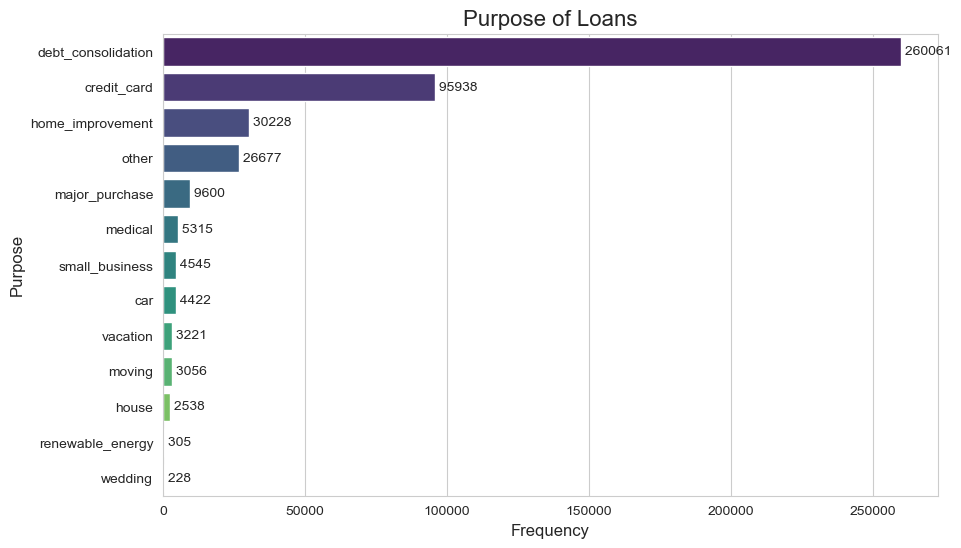

In [14]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(y=loans_df['purpose'].value_counts().index, 
            x=loans_df['purpose'].value_counts().values,
            palette="viridis")  # Use a seaborn color palette for better visuals

plt.title('Purpose of Loans', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Purpose', fontsize=12)

# Add values on each bar
for index, value in enumerate(loans_df['purpose'].value_counts().values):
    plt.text(value, index, f' {value}', va='center')

ax = plt.gca()

# Save the figure
loan_purpose = Path('../Screenshots/loan_purpose.png')
plt.savefig(loan_purpose, dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

The purpose for the majority of loans is debt and credit card consolidation. This is consistent with finding the average interst rate on a LendingClub loan is `12%`, as credit cards are usually over `20%`. 

#### ***Annual Income vs Loan Amount***

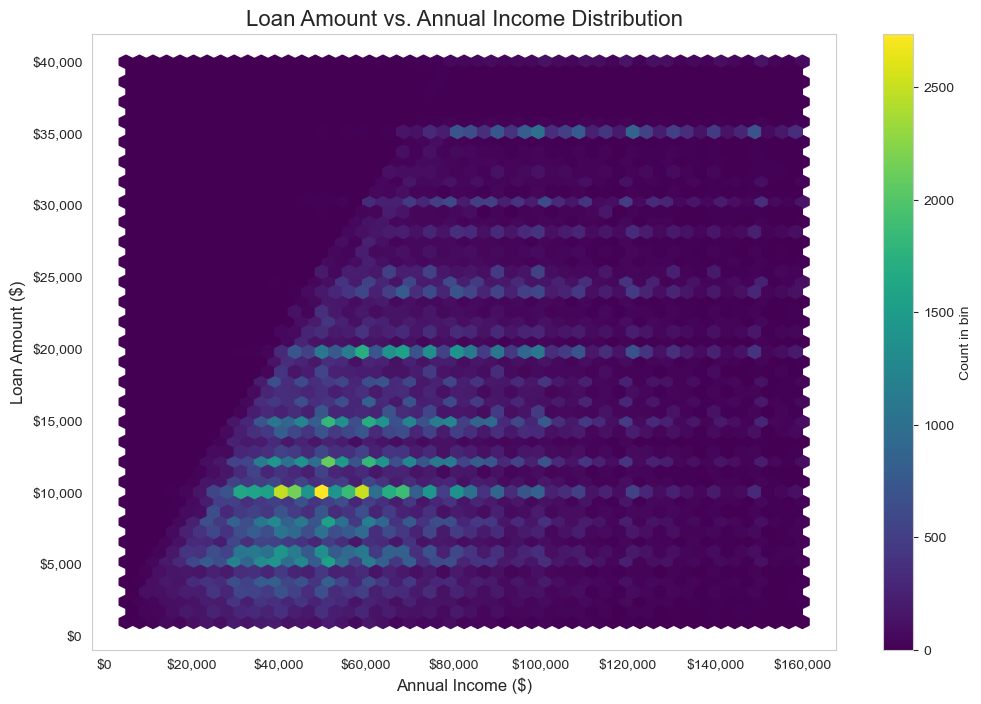

In [15]:
# Remove any annual income outliers
percentile_95 = loans_df['annual_inc'].quantile(0.95)
filtered_loans_df = loans_df[loans_df['annual_inc'] <= percentile_95]

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

plt.hexbin(filtered_loans_df['annual_inc'], filtered_loans_df['loan_amnt'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in bin')
plt.grid(False)

# Formatting axis labels with currency
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)
plt.gca().yaxis.set_major_formatter(tick)

plt.title('Loan Amount vs. Annual Income Distribution', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)

income_path = Path('../Screenshots/loan_amount_income.png')
plt.savefig(income_path, dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

Annual income linearly correlates to loan amount, however there is a very stark line in the hexbin. This could be due to a few reasons, such as the ability of higher income earners to borrow more, or LendingClub implementing a minimum annual income threshold for different loan amounts? This will be researched further. 

#### ***Correlation Heatmap***

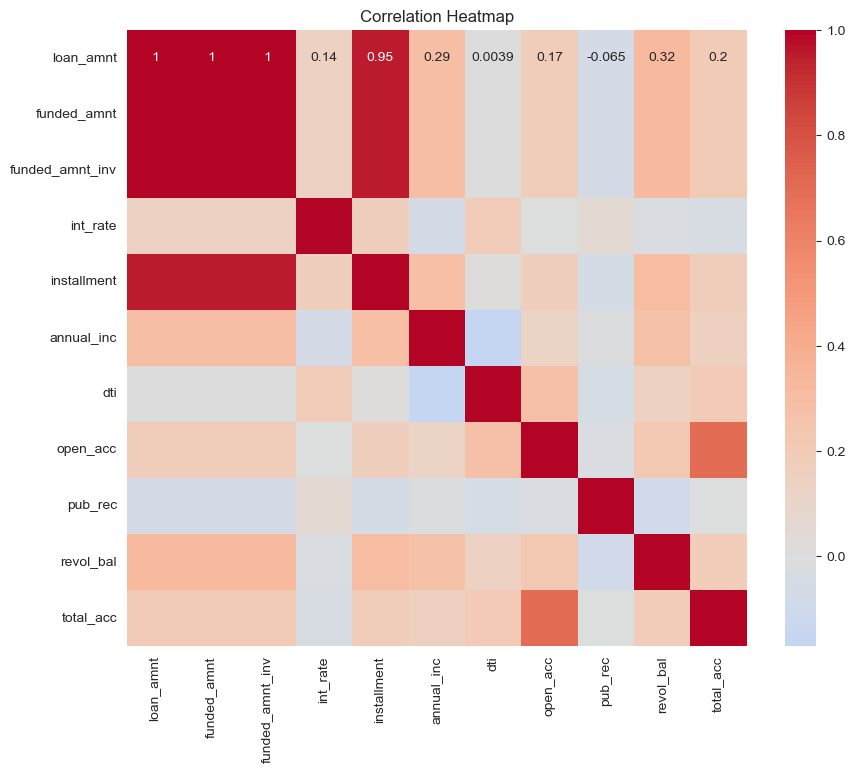

In [16]:
# Correlation heatmap
num_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']

corr = loans_df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

There are some features with correlation such as `open_acc` and `total_acc`. This info will be used later when linear assumptions must be met. 

#### ***FICO Score vs Interest Rate***

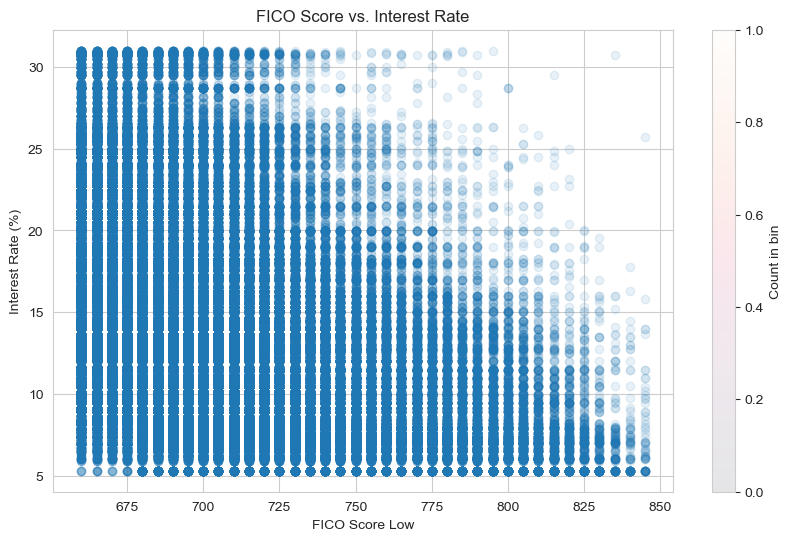

In [17]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(loans_df['fico_range_low'], loans_df['int_rate'], alpha=0.1)
plt.colorbar(label='Count in bin')

plt.title('FICO Score vs. Interest Rate')
plt.xlabel('FICO Score Low')
plt.ylabel('Interest Rate (%)')

plt.show()

There is a strong negative relationship between FICO Score and the interest rate. 

#### ***Loan Status Over Time***

<Figure size 1200x600 with 0 Axes>

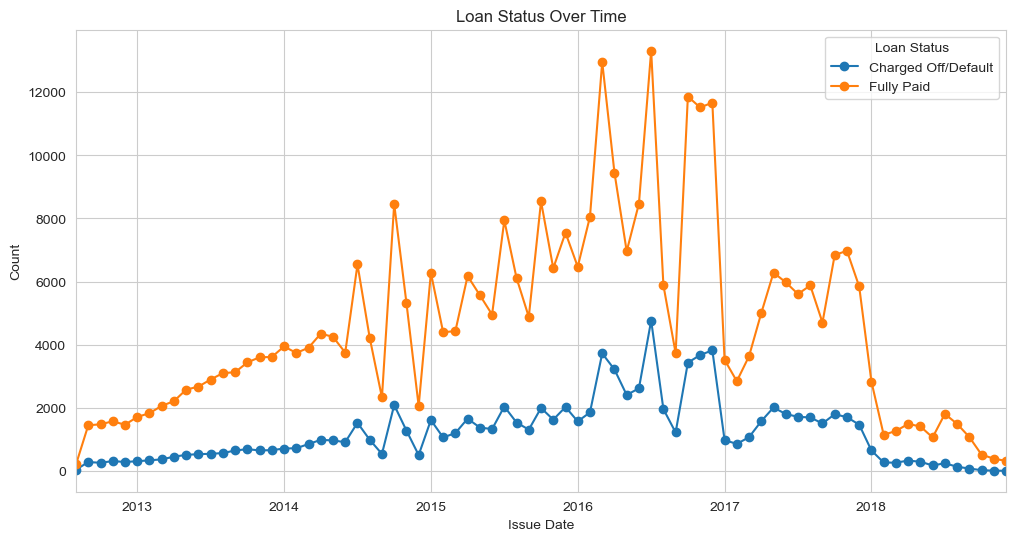

In [18]:
plt.figure(figsize=(12, 6))

loans_df.groupby('loan_status').resample('M').size().unstack(0).plot(marker='o', figsize=(12, 6))
plt.title('Loan Status Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

Similar to the **Number of loans and interest rate overtime** graph, fully paid loans peak in 2016,

#### ***Addr state chloropleth***

In [19]:
state_counts = loans_df['addr_state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
state_counts['state'] = state_counts['state'].str.upper()  # Ensure state codes are uppercase


# Create the choropleth map
fig = px.choropleth(state_counts,
                    locations='state',
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'count':'Number of Loans'},
                    title='Loan Distribution Across the US States')

fig.show()

state_chloropleth_path = Path('../Screenshots/State_chloropleth.png')
plt.savefig(state_chloropleth_path, dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### ***Histograms***

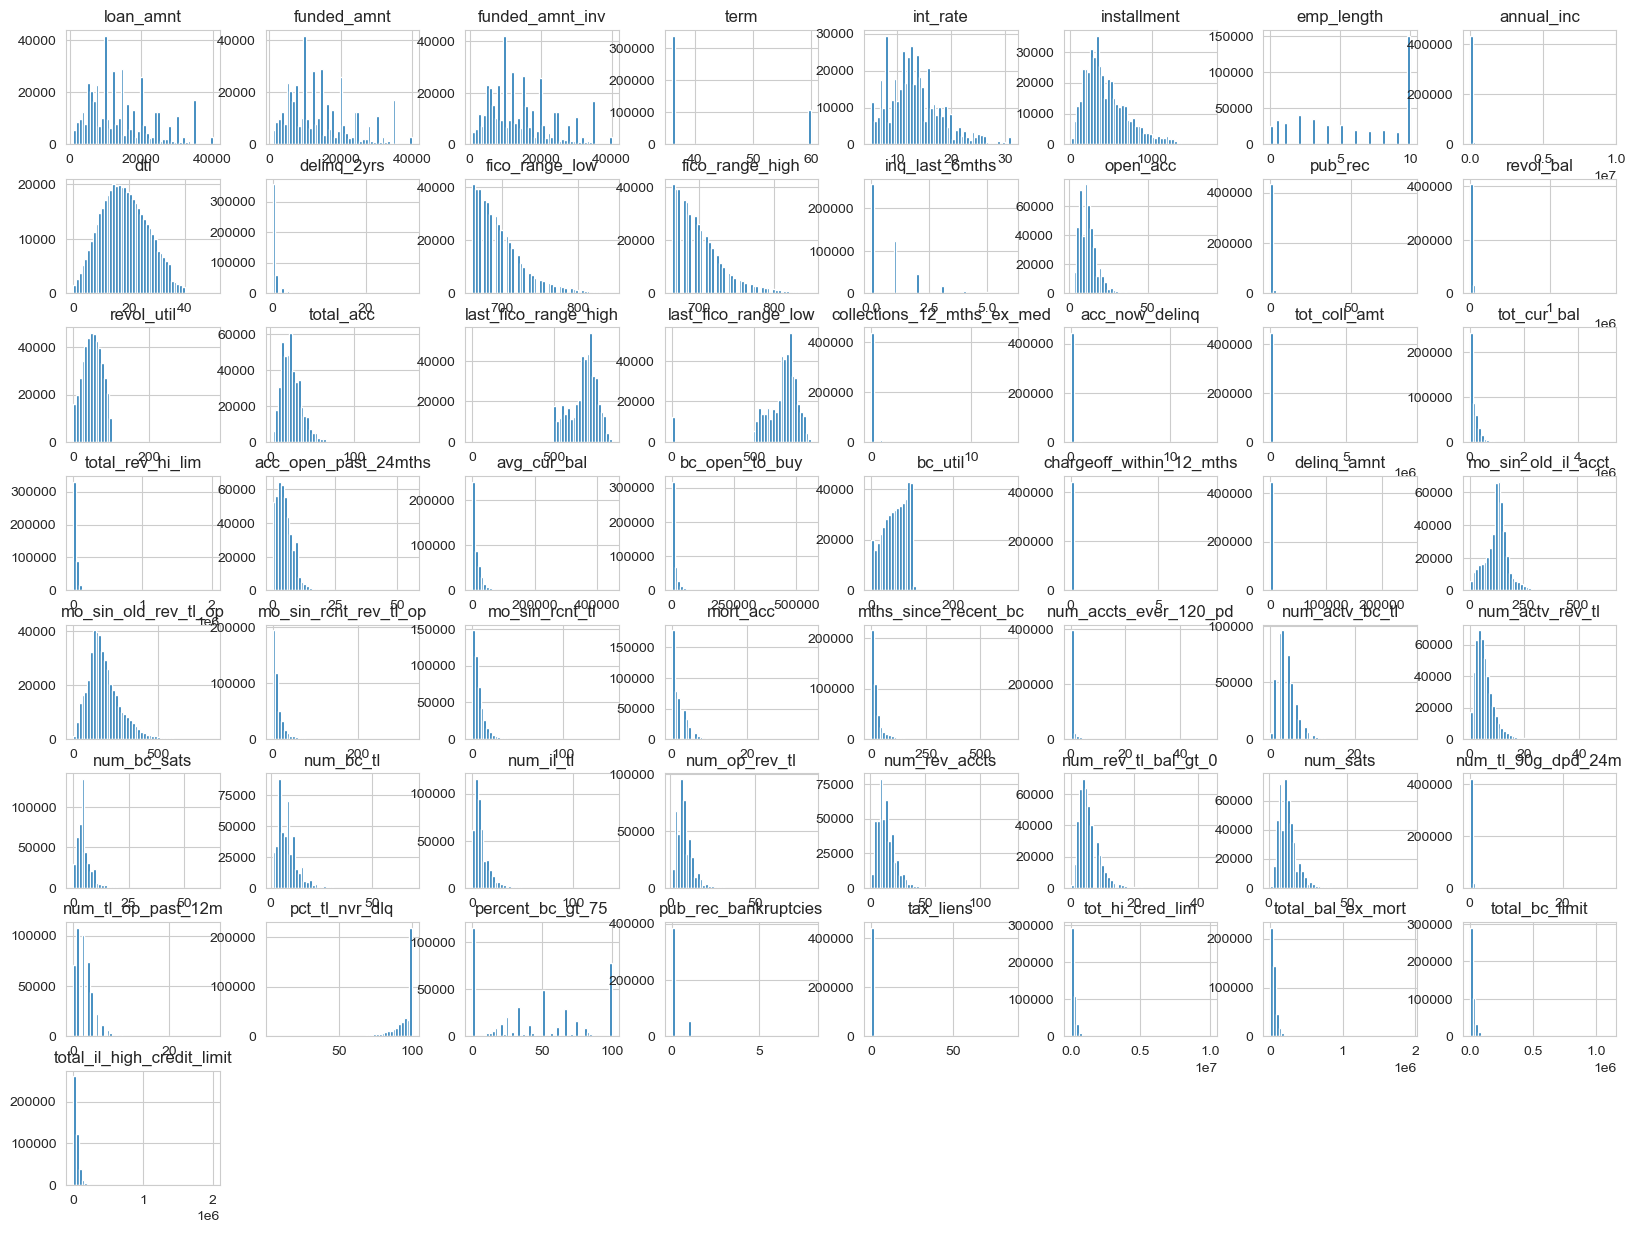

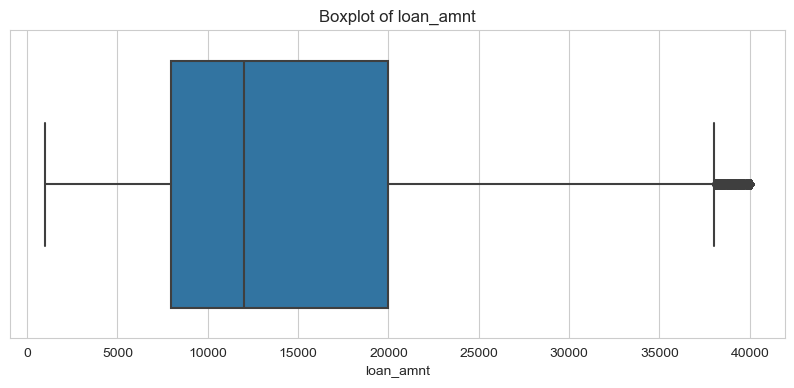

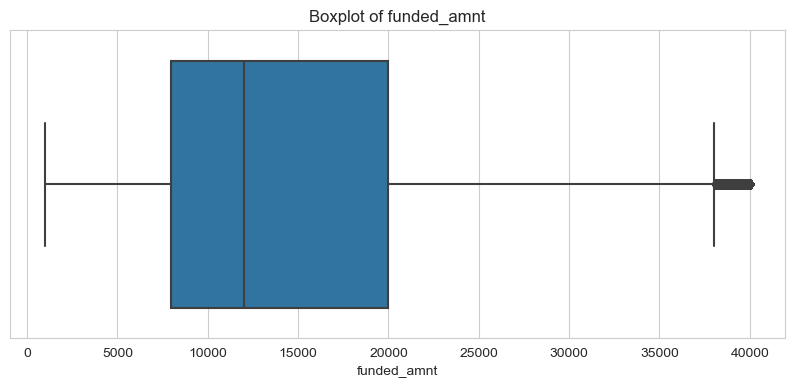

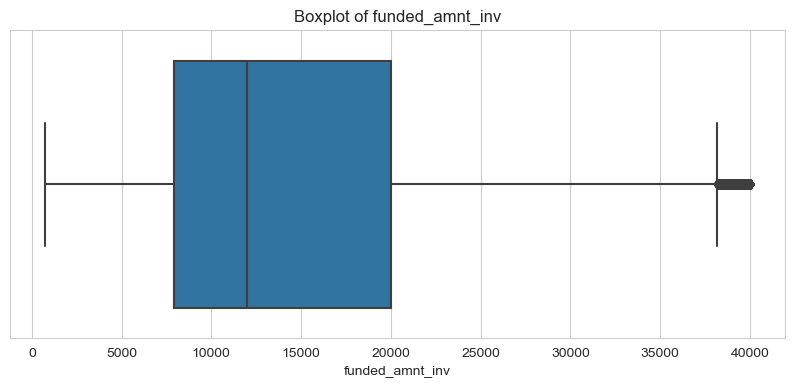

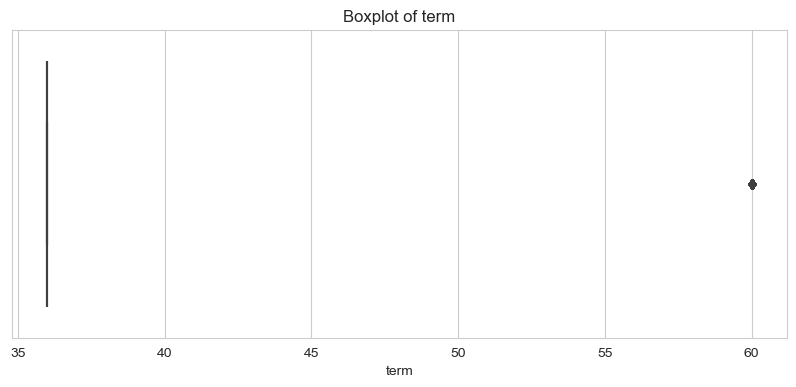

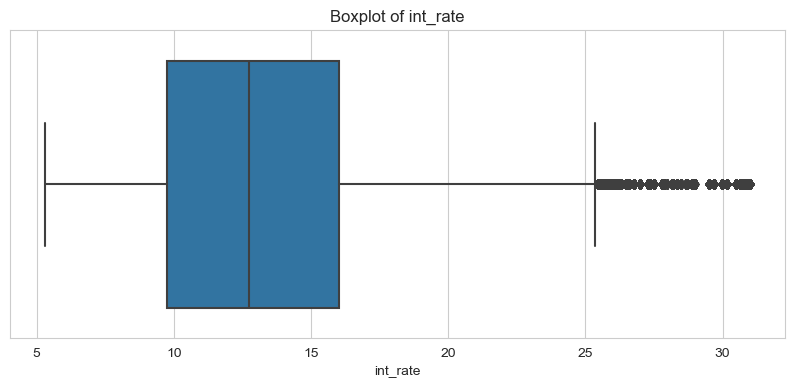

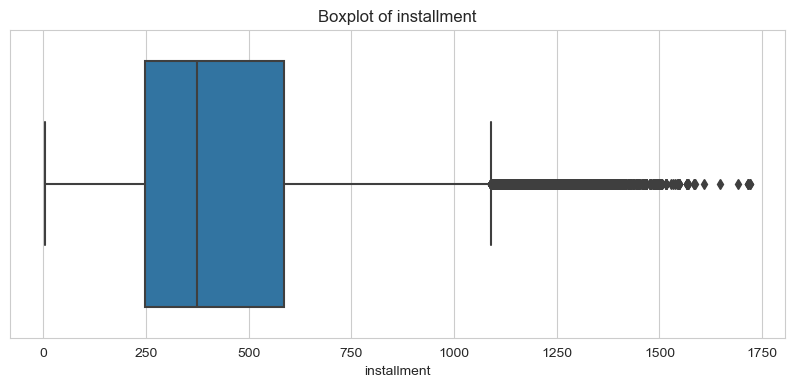

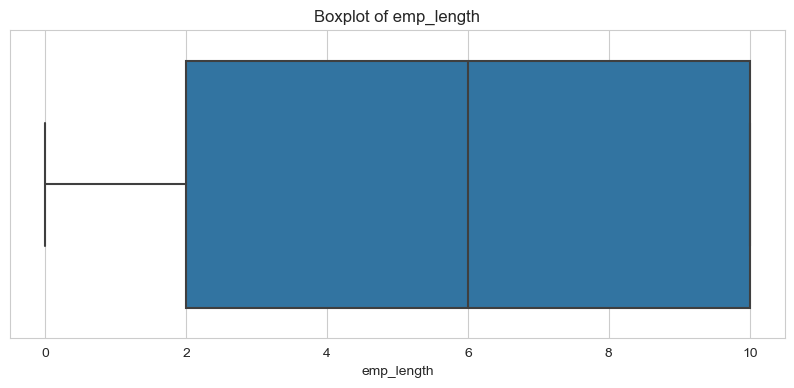

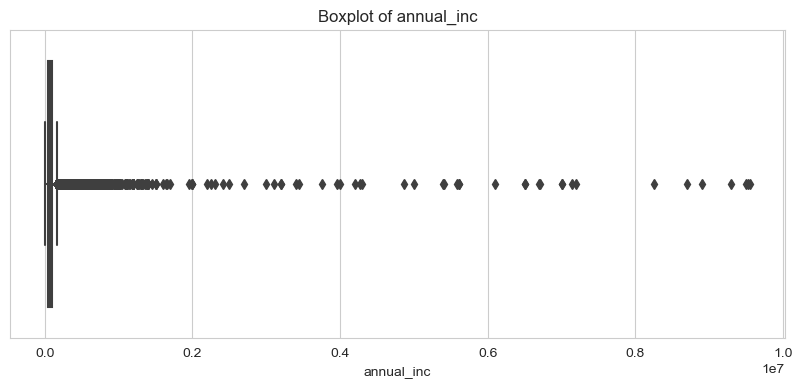

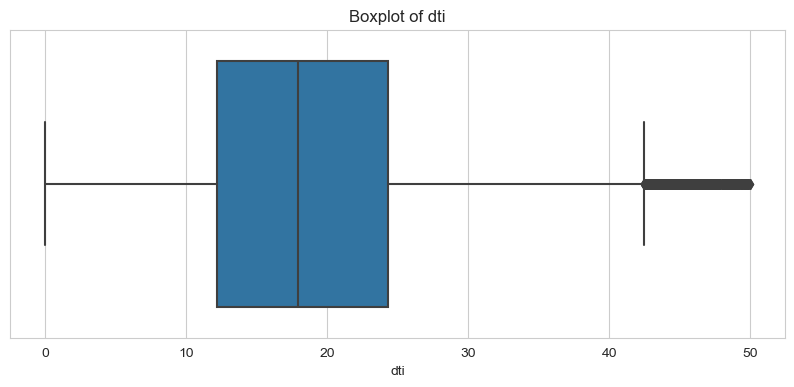

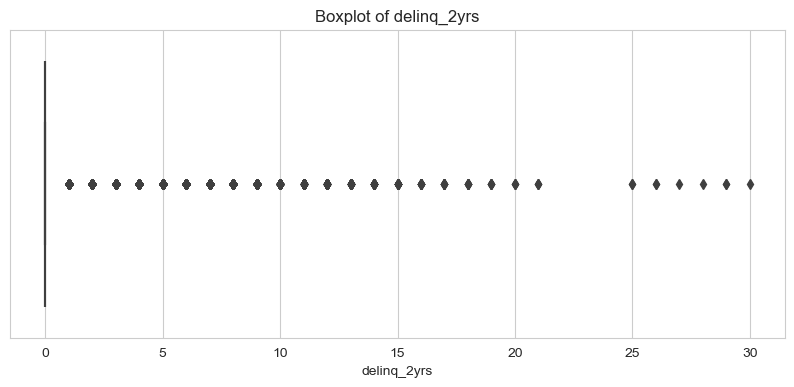

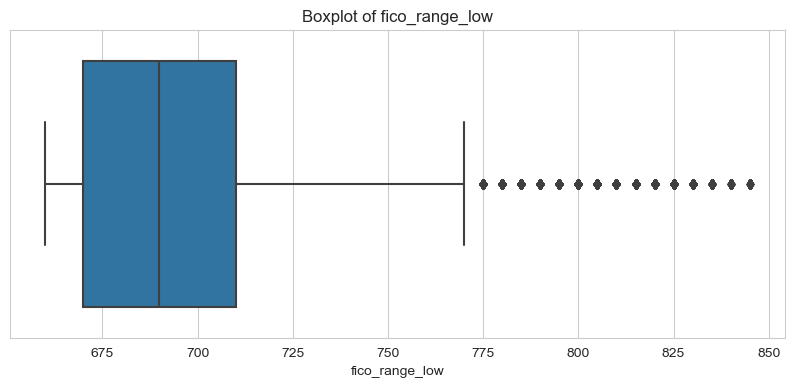

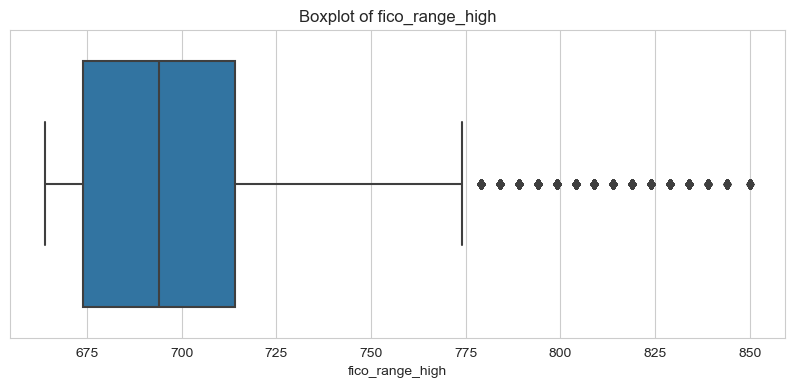

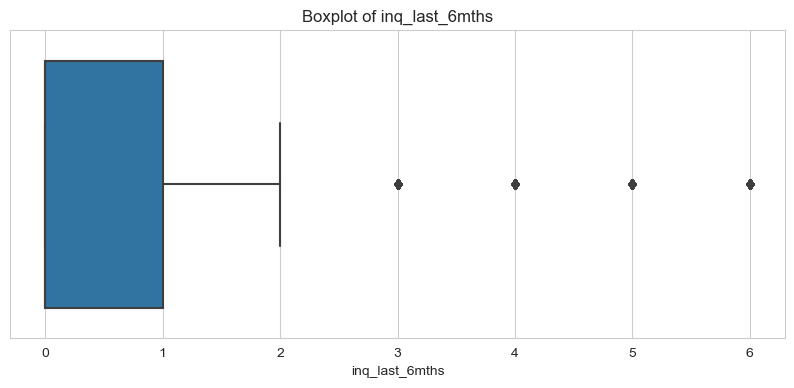

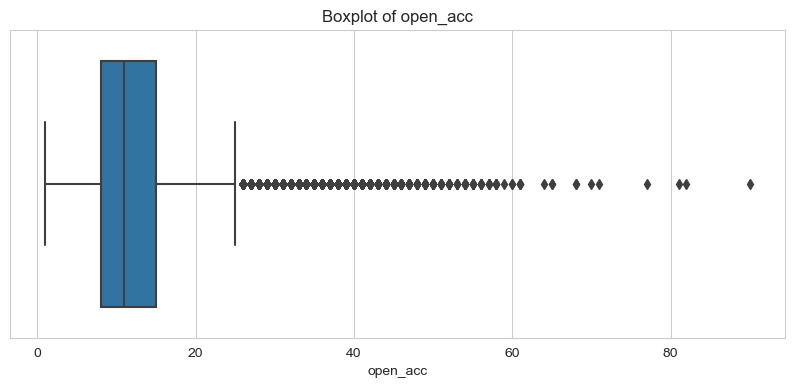

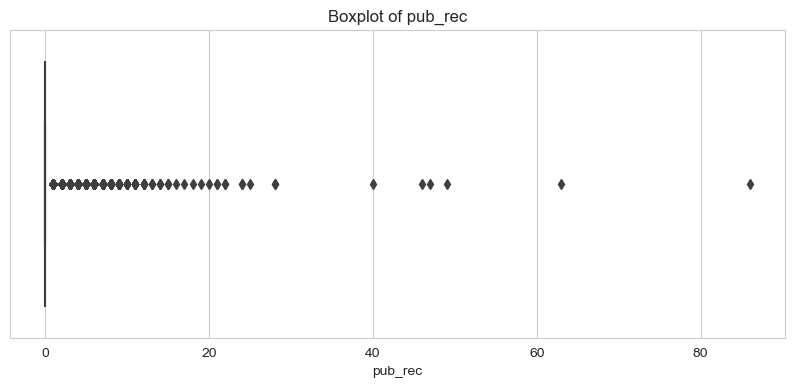

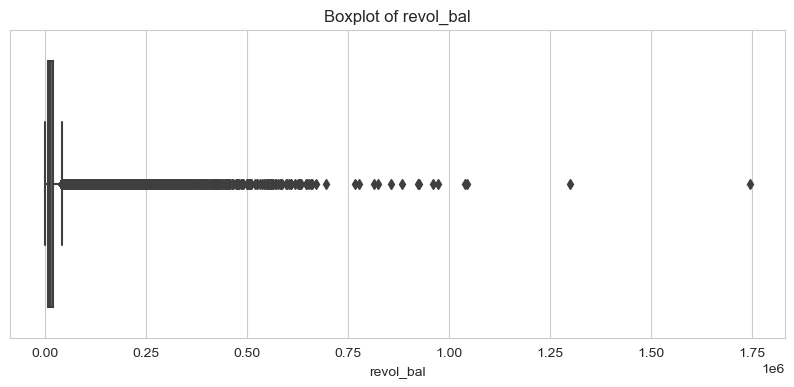

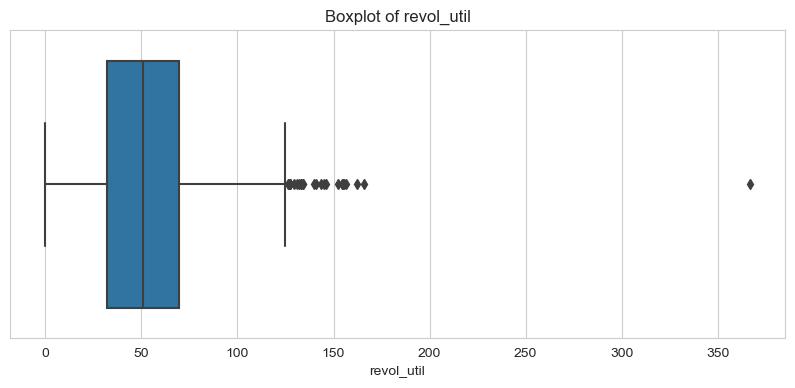

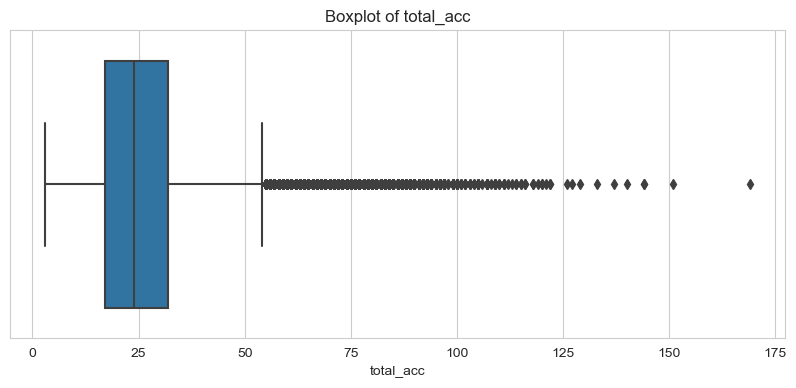

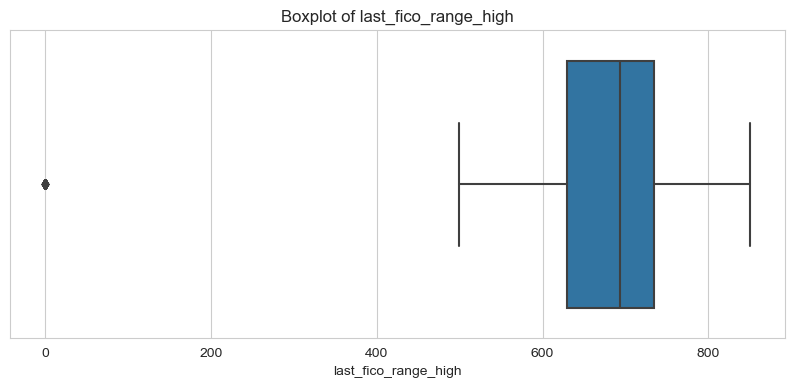

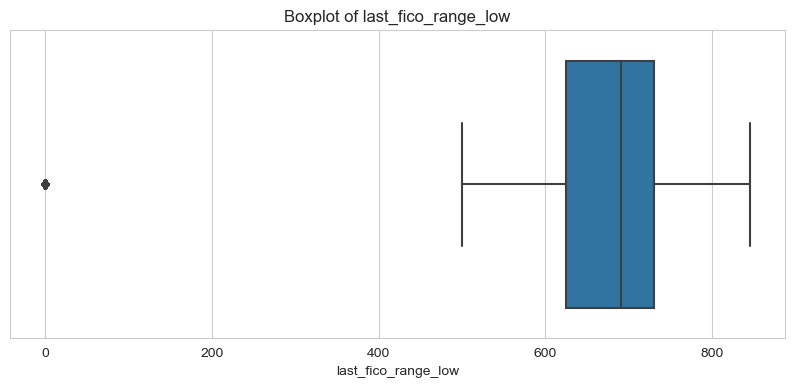

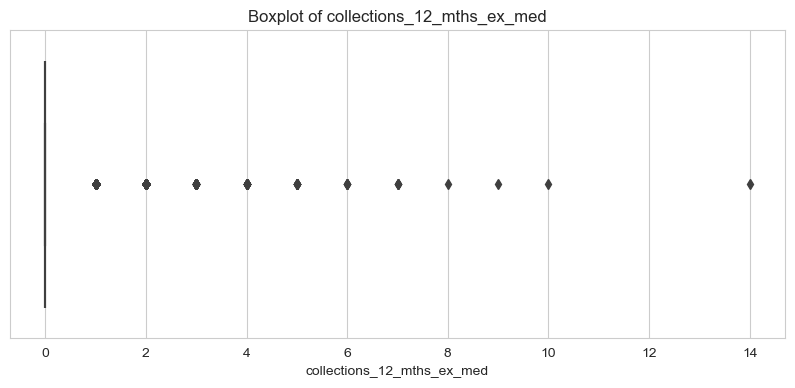

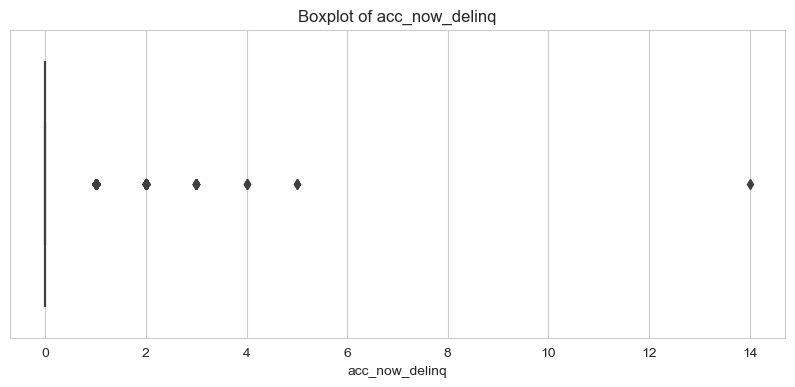

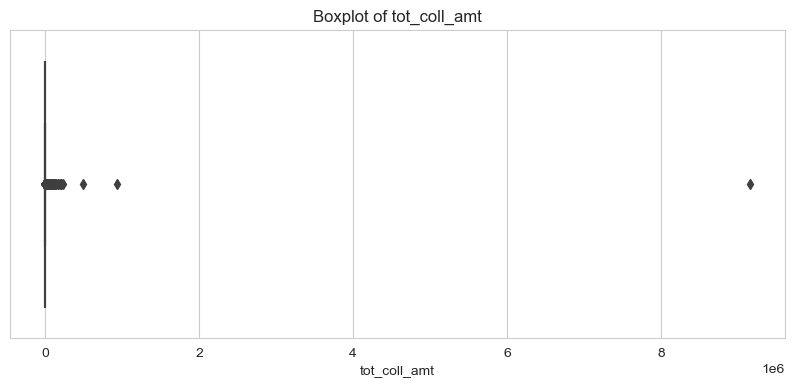

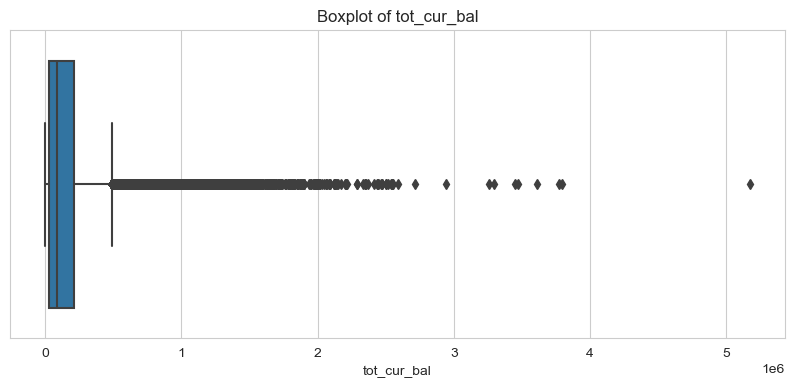

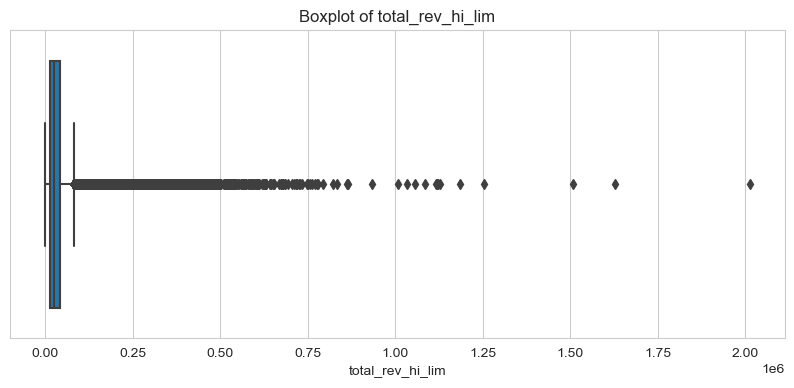

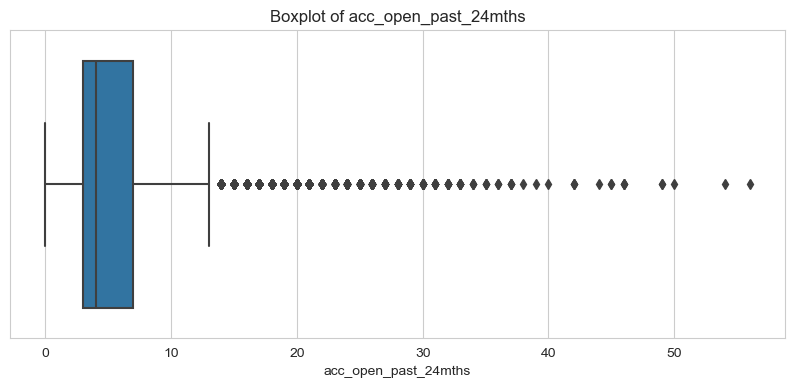

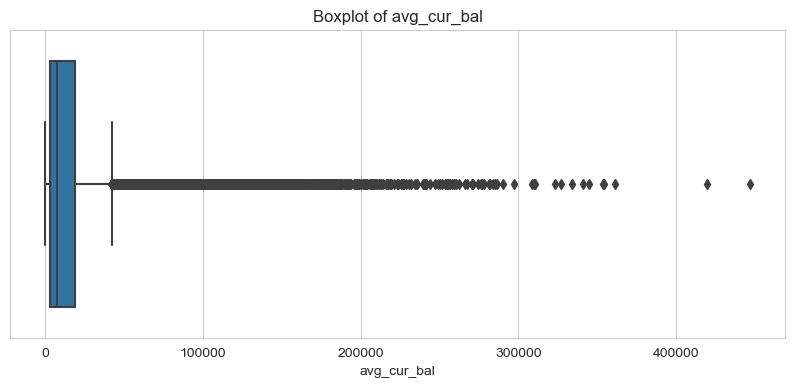

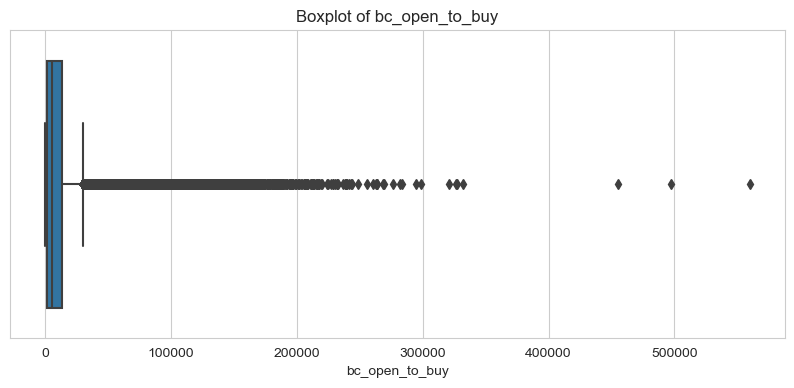

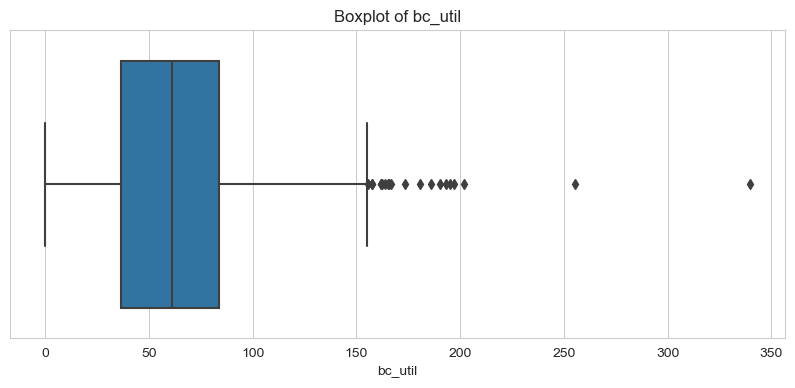

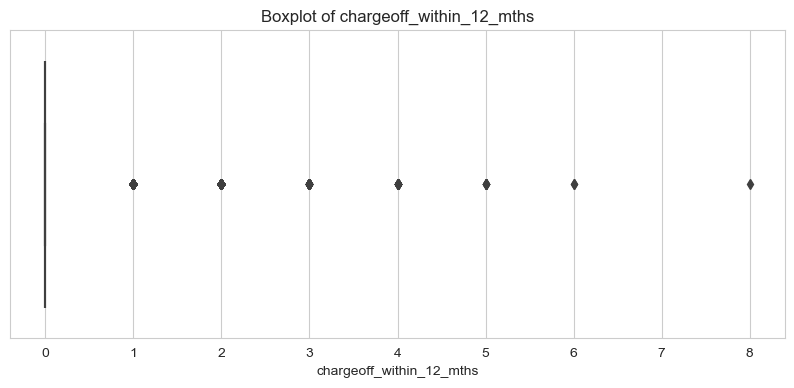

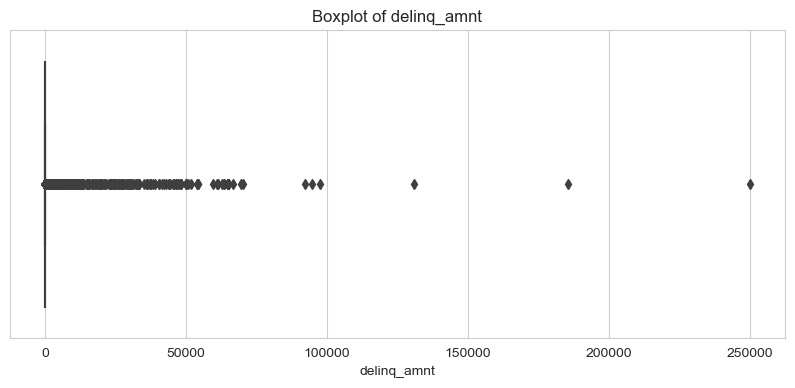

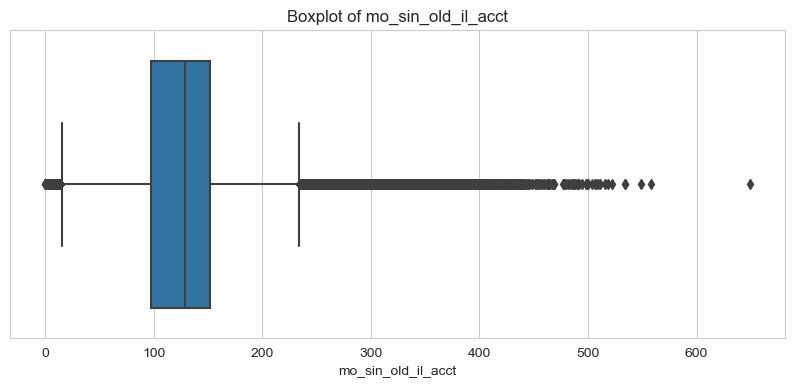

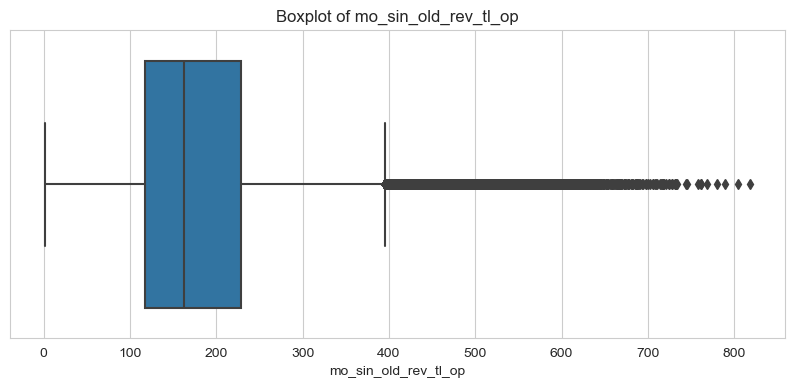

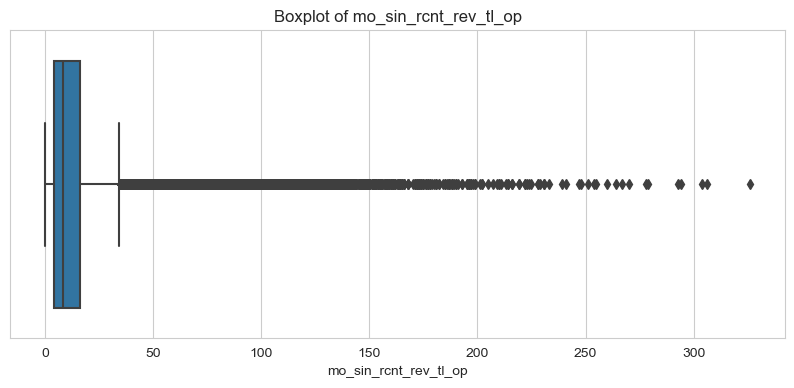

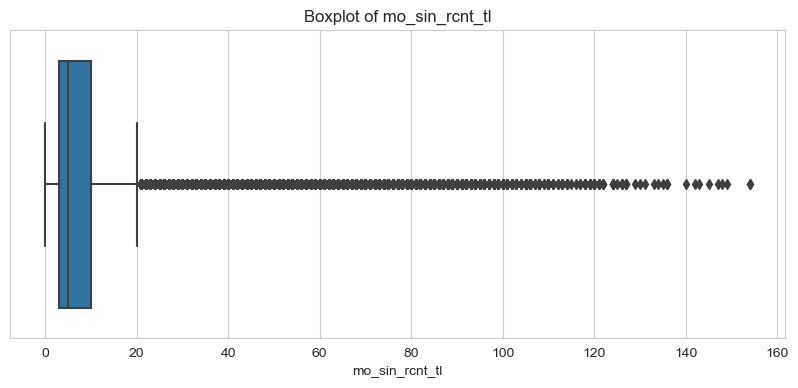

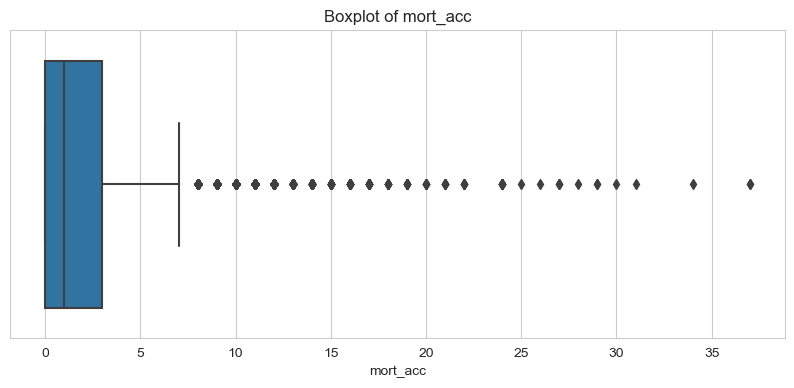

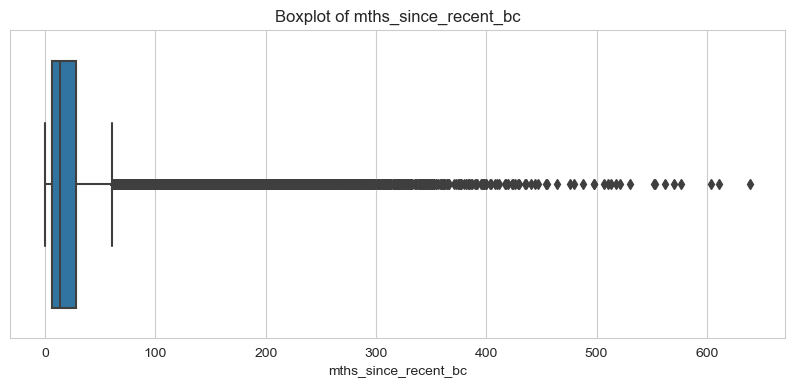

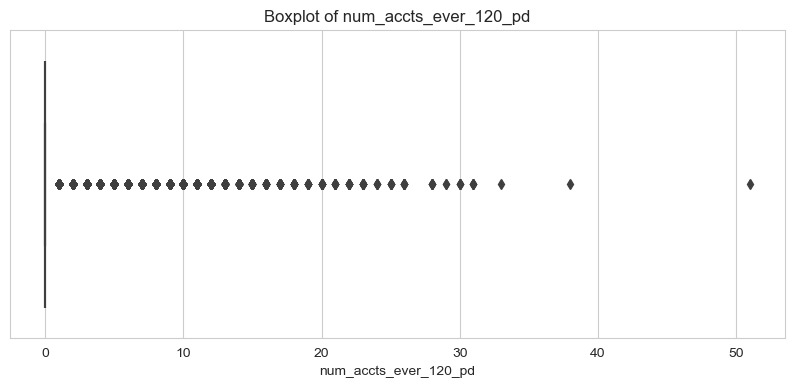

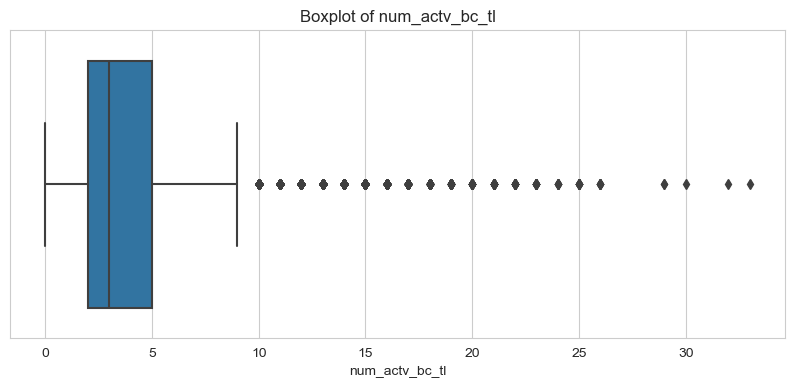

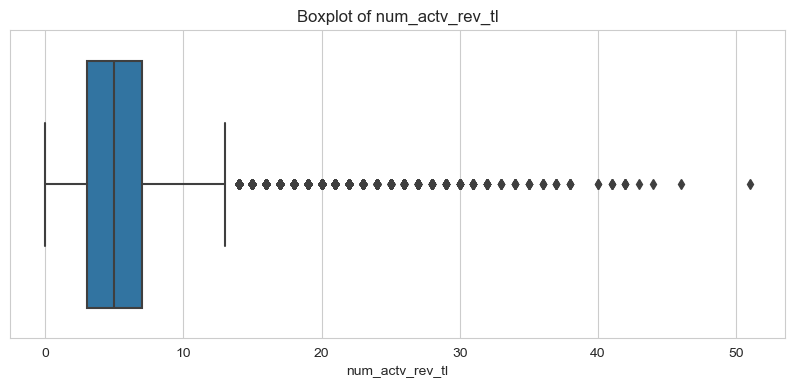

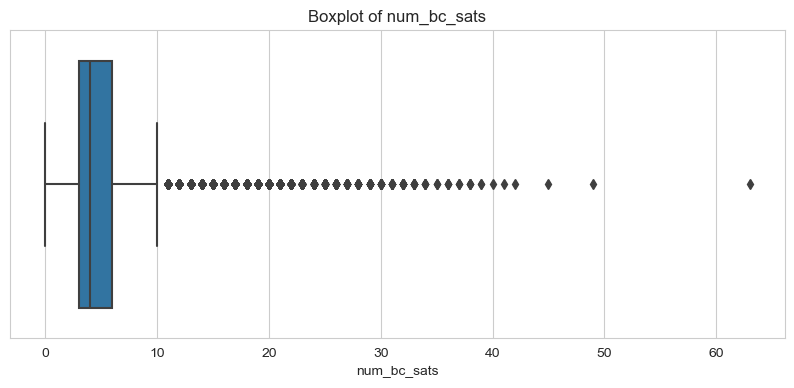

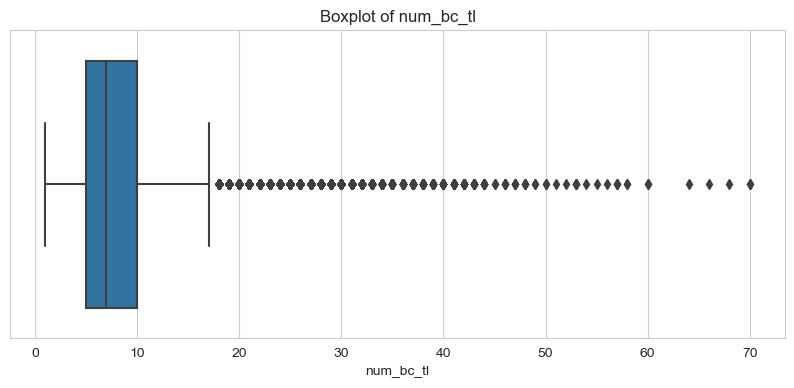

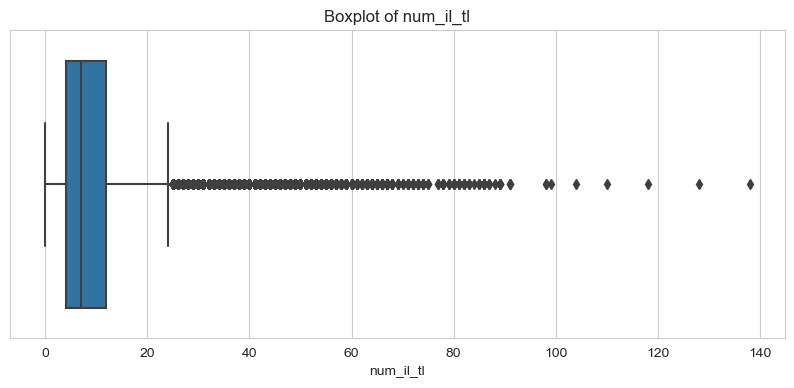

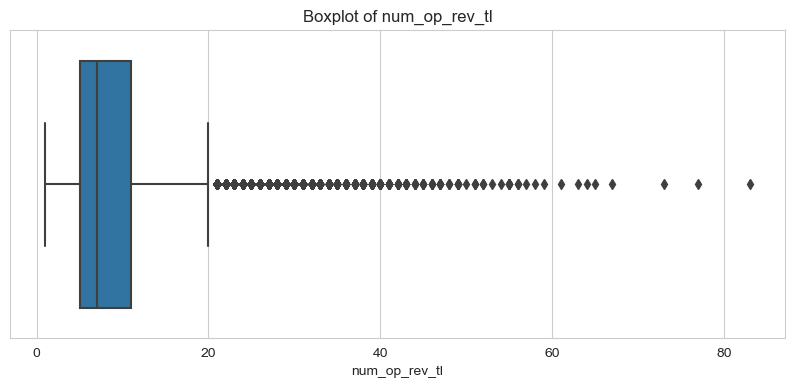

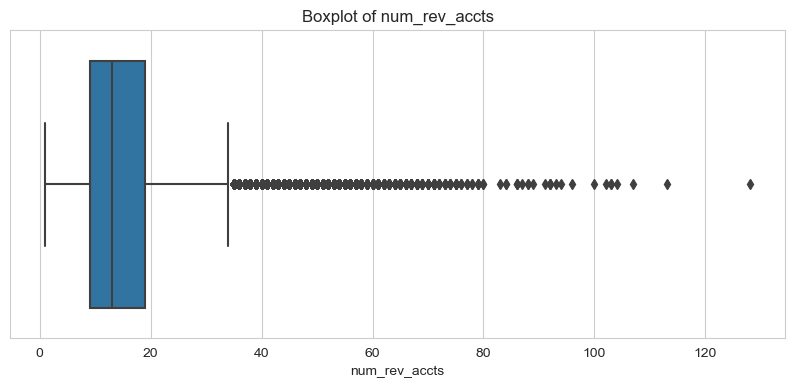

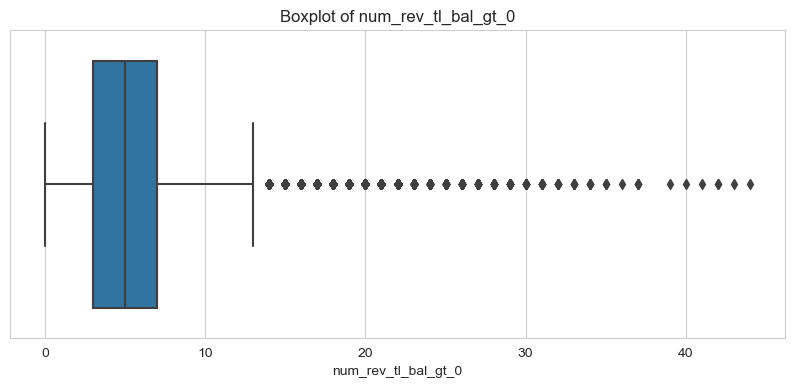

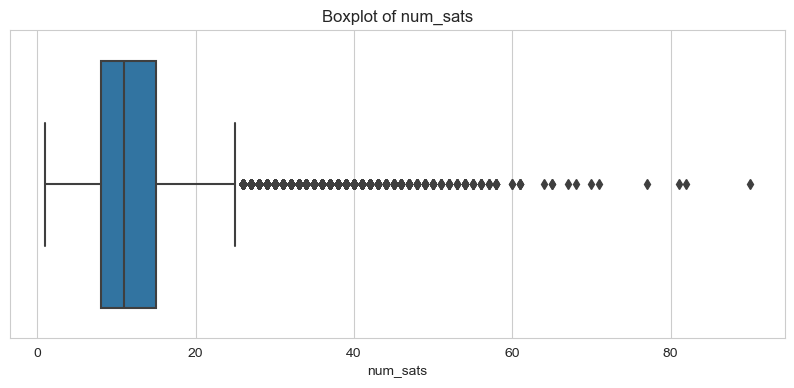

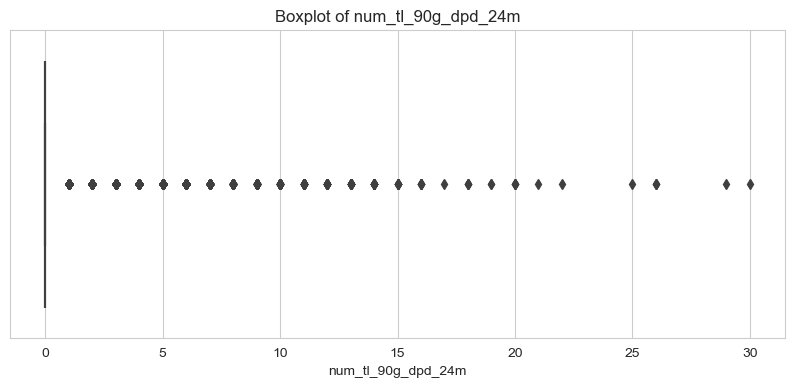

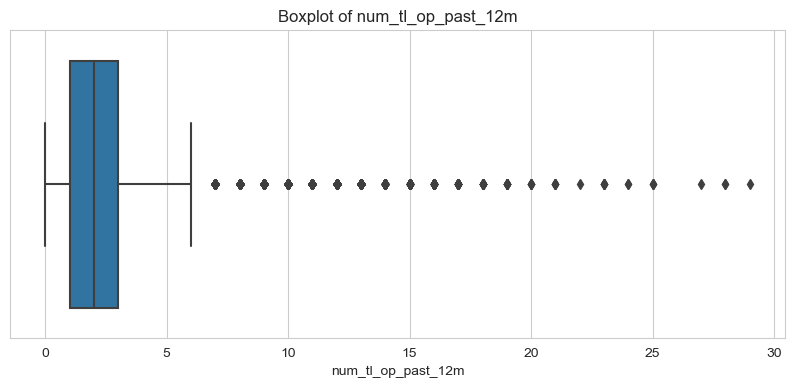

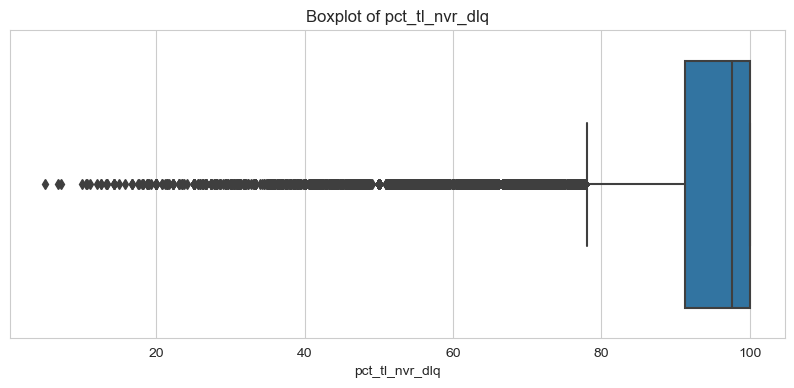

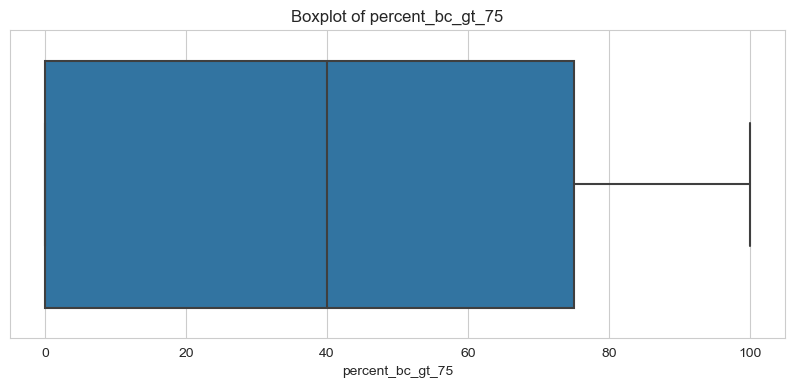

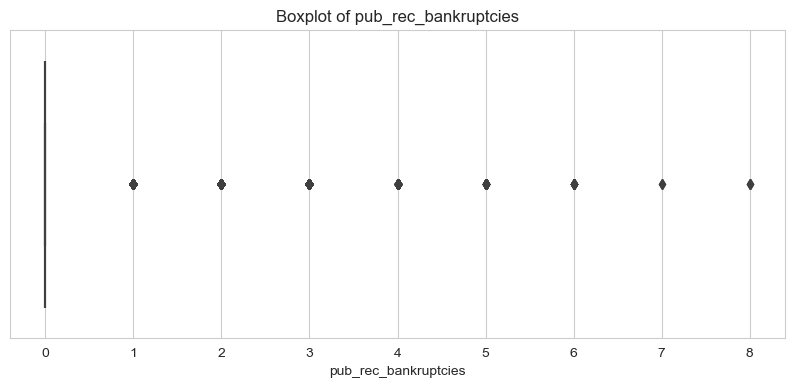

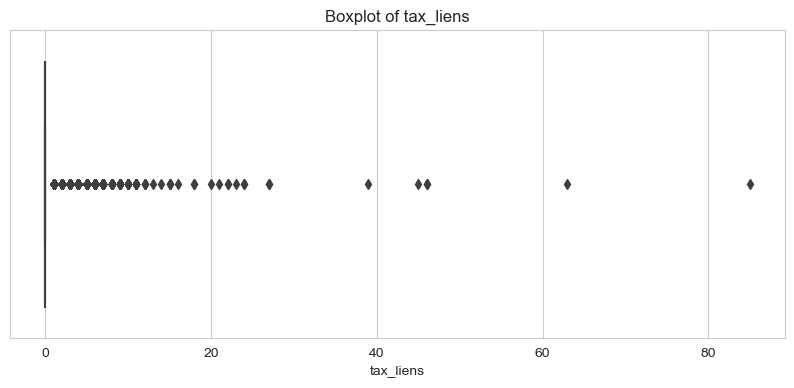

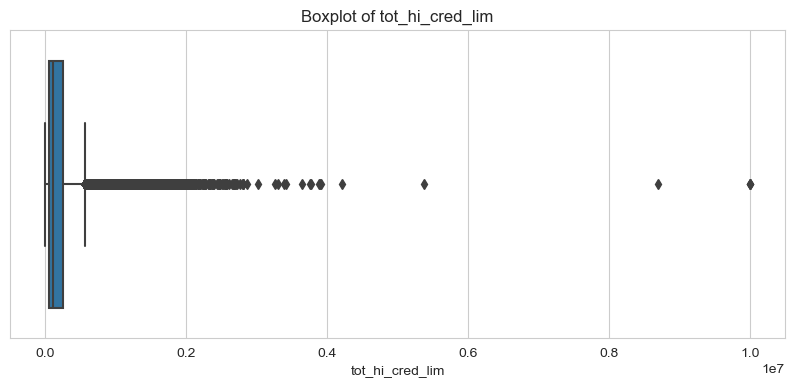

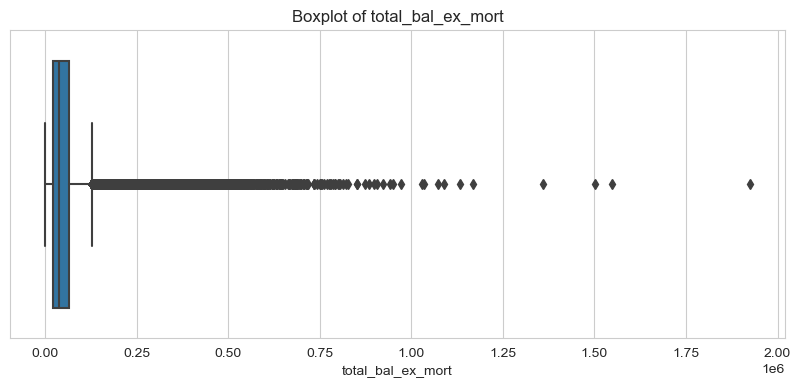

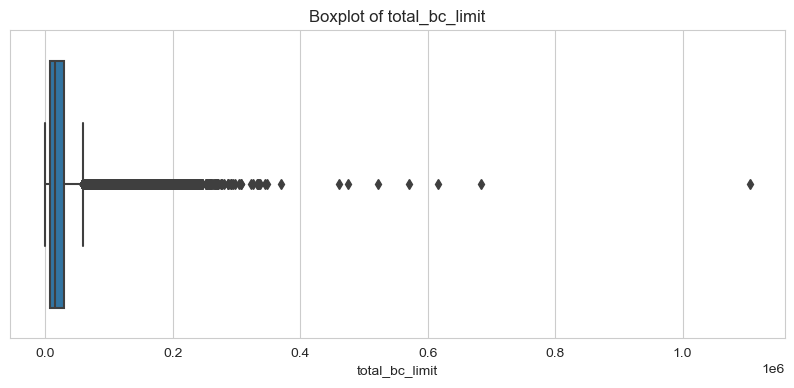

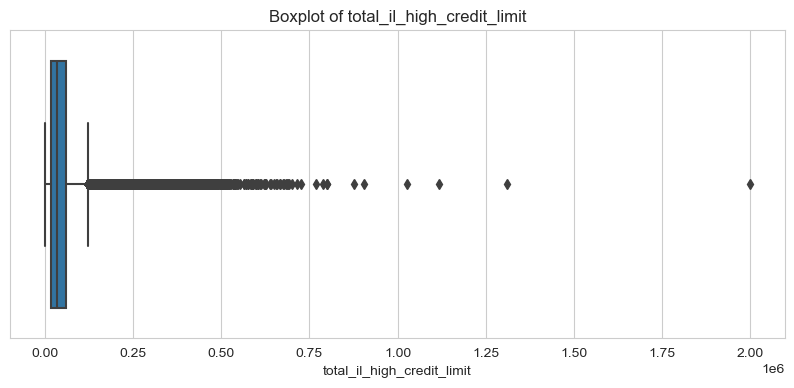

In [20]:
# Histograms for continuous data
loans_df.hist(bins=50, figsize=(20,15))
plt.show()

# Boxplots for outliers
for column in loans_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=loans_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Data Visualization


#### ***TSNE***

t-distributed Stochastic Neighbor Embedding (t-SNE), is a nonlinear dimensionality reduction technique used to visual high dimensional data. It tries to preserve local structure at the cost of global structure, although this can be tuned by the perplexity hyperparameter. The hyperparameter is roughly the number of close neighbors each point has, so a denser dataset usually requires a higher value.

In [21]:
model = Model_Wrapper(df = model_df)
X_train, X_test, y_train, y_test = model.train_test_split(target_column = 'loan_status', test_size = 0.1)

onehot_columns = X_train.select_dtypes('object').columns.tolist()
display(onehot_columns)

# Ordinal Encode verification status
onehot_columns.remove('verification_status')

onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
ordinal = OrdinalEncoder(categories=[['Not Verified', 'Source Verified', 'Verified']])

onehotdf = onehot.fit_transform(X_train[onehot_columns])
ordinaldf = ordinal.fit_transform(X_train[['verification_status']])

X_train['verification_status'] = ordinaldf

['home_ownership', 'verification_status', 'purpose', 'application_type']

In [22]:
model = Model_Wrapper(df = model_df)
X_train, X_test, y_train, y_test = model.train_test_split(target_column = 'loan_status', test_size = 0.1)

onehot_columns = X_train.select_dtypes(include='object').columns.tolist()
onehot_columns.remove('verification_status')

# One-Hot 
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
onehot.fit(X_train[onehot_columns])
onehot_df = pd.DataFrame(onehot.transform(X_train[onehot_columns]),
                         columns=onehot.get_feature_names_out(onehot_columns),
                         index=X_train.index)

# Ordinal 
ordinal = OrdinalEncoder(categories=[['Not Verified', 'Source Verified', 'Verified']])
ordinal.fit(X_train[['verification_status']])
ordinal_df = pd.DataFrame(ordinal.transform(X_train[['verification_status']]),
                          columns=['verification_status_encoded'],
                          index=X_train.index)

X_train.drop(columns=onehot_columns + ['verification_status'], inplace=True)

X_train_combined = pd.concat([X_train, onehot_df, ordinal_df], axis=1)

# Since TSNE is computationally heavy, take a sample
sample_size = 20000
X_train_sample = X_train_combined.sample(n=sample_size, random_state=22)

# Fit Standard Scaler since it is distance based
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sample)

tsne = TSNE(n_components=2, random_state=22, learning_rate='auto', n_jobs=3, perplexity=40, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.007s...
[t-SNE] Computed neighbors for 20000 samples in 2.650s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

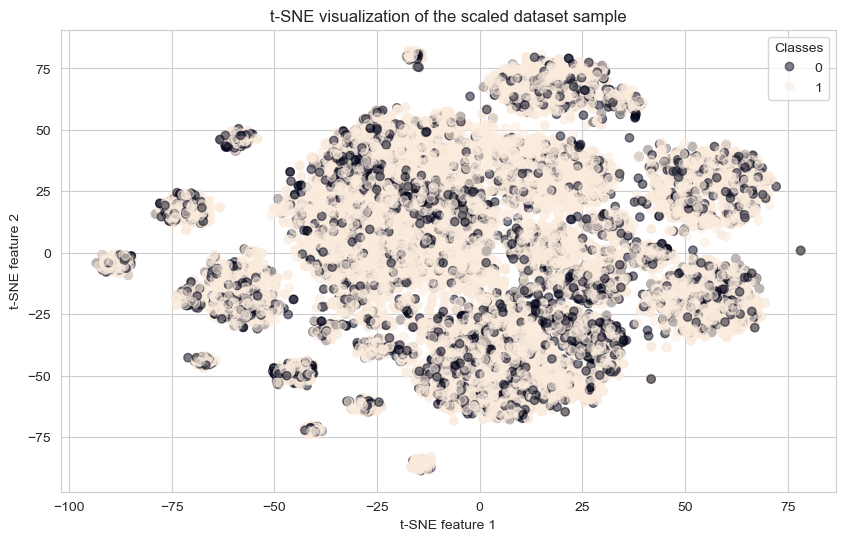

In [23]:
# Sample y_train to correspond to X_train_sample
y_train_sample = y_train.loc[X_train_sample.index]

# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5, c=y_train_sample)

# Creating a legend
# If y_train_sample is numerical
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('t-SNE visualization of the scaled dataset sample')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

It is important to note that:
- TSNE expands dense clusters and shrinks sparse ones, ie a sort of density equalization
- distance between clusters is not preserved
- some small clusters might simply be noise
- the size of clusters does not hold any inherent meaning about the importance or size of those groups in the original dataset


Further Reading:
- https://freedium.cfd/https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0
- https://freedium.cfd/https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17
- https://distill.pub/2016/misread-tsne/
- https://arxiv.org/pdf/2109.08795.pdf
- https://datascience.stackexchange.com/questions/36889/what-does-it-mean-by-t-sne-retains-the-structure-of-the-data
- https://www.youtube.com/watch?v=RJVL80Gg3lA

#### ***UMAP***

UMAP does a better job overall of preserving global structure than TSNE, however this can also be tuned using the hyperparameters:
- n_neighbors is the approximate nearest neighbors used to construct the initial high-dimensional graph, ie, it controls the balance between preserving local vs global structure, with lower values pushing UMAP to focus on local structure.
- min_dist is the minimum distance between points in low-dimensional space, ie how tightly UMAP groups points together.

UMAP
https://pair-code.github.io/understanding-umap/

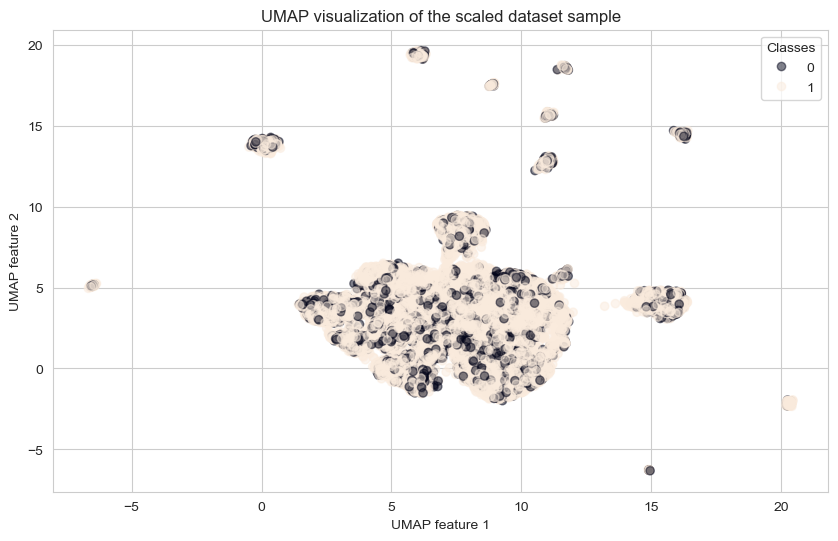

In [24]:
reducer = umap.UMAP(
    n_neighbors=40,
    n_components=2,
    metric='euclidean',
    min_dist=0.25,
    spread=1.0
)
X_train_umap = reducer.fit_transform(X_train_scaled)

# Sample y_train to correspond to X_train_sample
y_train_sample = y_train.loc[X_train_sample.index]

# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], alpha=0.5, c=y_train_sample)

# Creating a legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('UMAP visualization of the scaled dataset sample')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.show()

Like TSNE, it is important to note that:

- UMAP does not preserve density or distances ie cluster size and distance between clusters does not hold any inherent value.
- Spurious clustering is quite high with low values of n_neighbors.

Further Reading:
- https://umap-learn.readthedocs.io/en/latest/basic_usage.html  
- https://pair-code.github.io/understanding-umap/
- https://arxiv.org/abs/1802.03426